<<< Summary >>> 

My data analytics project looked at border crossing data at all US border stations. The goal was to determine the highest 
volume stations and highest volume measure types. The analysis also looked at illegal immigrant arrest volumes 
within the US. The goal was to determine the highest volume stations and types. The last piece of analysis asked 
the question is their a correlation between the highest volume border crossings and illegal immigrant arrests. 
I used Excel, SQLite, Jupyter Notebook, Pandas, SQLalchemy, and matplotlib to complete this work.

Special thanks to <a href="https://www.linkedin.com/in/akhil-vasvani/">Akhil Vasvani</a></small>
and the <a href="https://www.cbp.gov/">US Customs and Border Protection</a></small> for use of their data.

EXTRACT & TRANSFORM

Data Source 1 >>>

<img src="borders.png">

This is the provided Arrest.csv file I fetched from Kaggle.com. Cleaned out all data with 0 in Measure field.
I created the id column and autonumbered 346,733 rows of data.

<img src="excel_borders.png">

I used SQLite to create the Crossings table and imported the data from the CSV file.
I updated the id field checkboxs on for NN and PK, since SQLalchemy automap to run.

<img src="sqlite_borders.png">

Here's a snapshot of the data...
<img src="sqlite_borders_data.png">

Data Source 2 >>>

<img src="illegals.png">

This is the provided Arrest.csv file I fetched from Kaggle.com. I had to clean this data because the provider had 
placed year totals in rows, so I had to remove them. He also placed the yearly totals in seperate columns, 
so I had to aggregate them into one column and create a date field for it to work. I needed to decide which groupin 
for the two tables to use and I settled on using the one from the crossings table and updated it in the arrest table.
I created the id column and autonumbered 340 rows of data. 
<a href="https://www.cato.org/blog/illegal-alien-one-many-correct-legal-terms-illegal-immigrant
">(Legal Definition)</a></small>
<img src="excel_illegals.png">

I used SQLite to create the Arrests table and imported the data from the CSV file.
I updated the id field checkboxs on for NN and PK, since SQLalchemy automap to run.

<img src="sqlite_illegals.png">

Here's a snapshot of the data...
<img src="sqlite_illegals_data.png">

LOAD

In [1]:
# Load Dependencies
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Create the SQL Engine
engine = create_engine("sqlite:///Resources/Border.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# We can view all of the classes that automap found
Base.classes.keys()

['Arrests', 'Crossings']

In [5]:
# Make references to each table
Arrests = Base.classes.Arrests
Crossings = Base.classes.Crossings

In [6]:
# Create a session (link) from Python to the DB
session = Session(engine)

CROSSINGS ANALYSIS

In [7]:
# Find the data structure of the Crossings class
Crossings_first = session.query(Crossings).first()
Crossings_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d00fc34780>,
 'Value': 34447,
 'Date': '3/1/2019 0:00',
 'PortCode': 2507,
 'PortName': 'Calexico East',
 'id': 1,
 'Location': 'POINT (-115.48433000000001 32.67524)',
 'Measure': 'Trucks',
 'Border': 'US-Mexico Border',
 'State': 'California'}

In [8]:
# Query total crossings by common border
CrossingCbB = session.query(Crossings.Border, func.sum(Crossings.Value)).\
    group_by(Crossings.Border).order_by(func.sum(Crossings.Value).desc()).all()
CrossingCbB

[('US-Mexico Border', 7085632048), ('US-Canada Border', 2687962793)]

In [9]:
# Create the dataframe
x = [list(x) for x in CrossingCbB]
CrossingCbB_df = pd.DataFrame(x)
CrossingCbB_df = CrossingCbB_df.rename(columns={0:'Border', 1:'Value'})
CrossingCbB_df.head(10)

,Border,Value
0,US-Mexico Border,7085632048
1,US-Canada Border,2687962793


<IPython.core.display.Javascript object>


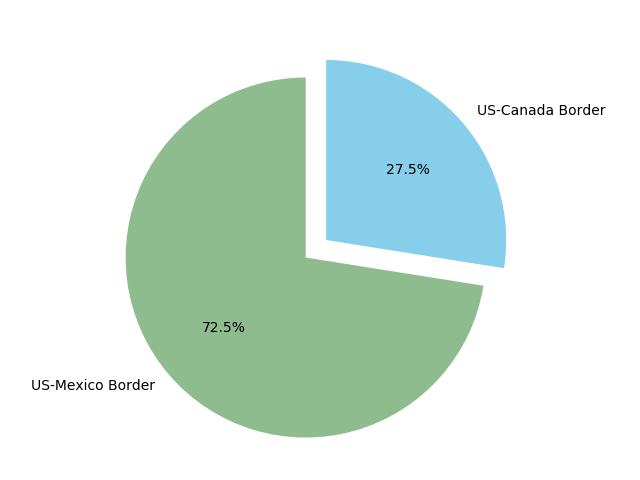

In [11]:
# Create plot
# Pick your colors
colors = ['darkseagreen', 'skyblue']

# Create a pie chart
plt.pie(
    # use this data
    CrossingCbB_df['Value'],
    # label with this
    labels=CrossingCbB_df['Border'],
    # Shadows?
    shadow=False,
    # Colors?
    colors=colors,
    # Explode slices?
    explode=(0.15, 0),
    # Starting angle?
    startangle=90,
    # Format percentage
    autopct='%1.1f%%',
)

# View the plot

plt.tight_layout()
plt.show()


In [12]:
# Query total crossings by state
CrossingCbS = session.query(Crossings.State, func.sum(Crossings.Value)).\
    group_by(Crossings.State).order_by(func.sum(Crossings.Value).desc()).all()
CrossingCbS

[('Texas', 3633098966),
 ('California', 2499521716),
 ('Arizona', 888075092),
 ('New York', 827170661),
 ('Michigan', 753167571),
 ('Washington', 501550846),
 ('Maine', 231249782),
 ('Vermont', 114257813),
 ('Minnesota', 95764039),
 ('North Dakota', 75722498),
 ('New Mexico', 64936274),
 ('Montana', 54160434),
 ('Idaho', 20998428),
 ('Alaska', 13920348),
 ('Ohio', 373)]

In [13]:
# Create the dataframe
x = [list(x) for x in CrossingCbS]
CrossingCbS_df = pd.DataFrame(x)
CrossingCbS_df = CrossingCbS_df.rename(columns={0:'State', 1:'Value'})
CrossingCbS_df.head(10)

,State,Value
0,Texas,3633098966
1,California,2499521716
2,Arizona,888075092
3,New York,827170661
4,Michigan,753167571
5,Washington,501550846
6,Maine,231249782
7,Vermont,114257813
8,Minnesota,95764039
9,North Dakota,75722498


<IPython.core.display.Javascript object>


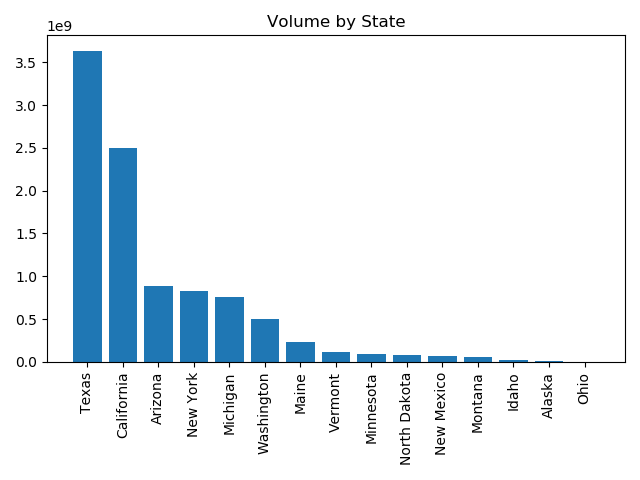

In [14]:
# Create bar chart
x_axis = CrossingCbS_df["State"]
y_axis = CrossingCbS_df["Value"]
ticks = np.arange(len(x_axis))
plt.bar(x_axis, y_axis, align="center", alpha=1.0)
plt.xticks(ticks, x_axis, rotation="vertical")
plt.title("Volume by State")
plt.tight_layout()
plt.show()

In [15]:
# Query total crossings by measure
CrossingMbS = session.query(Crossings.Measure, func.sum(Crossings.Value)).\
    group_by(Crossings.Measure).order_by(func.sum(Crossings.Value).desc()).all()
CrossingMbS

[('Personal Vehicle Passengers', 5457391275),
 ('Personal Vehicles', 2559691192),
 ('Pedestrians', 1044218114),
 ('Trucks', 253654160),
 ('Truck Containers Full', 177190287),
 ('Bus Passengers', 142330871),
 ('Truck Containers Empty', 64046035),
 ('Rail Containers Full', 38288393),
 ('Rail Containers Empty', 21139444),
 ('Buses', 8543756),
 ('Train Passengers', 6197450),
 ('Trains', 903864)]

In [16]:
# Create the dataframe
x = [list(x) for x in CrossingMbS]
CrossingMbS_df = pd.DataFrame(x)
CrossingMbS_df = CrossingMbS_df.rename(columns={0:'Measure', 1:'Value'})
CrossingMbS_df.head(10)

,Measure,Value
0,Personal Vehicle Passengers,5457391275
1,Personal Vehicles,2559691192
2,Pedestrians,1044218114
3,Trucks,253654160
4,Truck Containers Full,177190287
5,Bus Passengers,142330871
6,Truck Containers Empty,64046035
7,Rail Containers Full,38288393
8,Rail Containers Empty,21139444
9,Buses,8543756


<IPython.core.display.Javascript object>


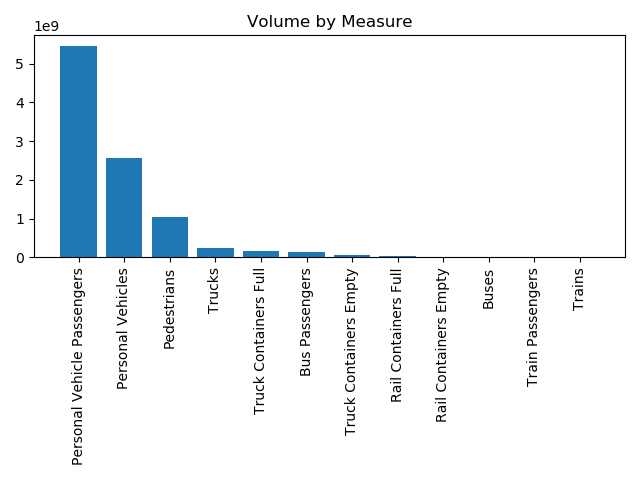

In [17]:
# Create bar chart
x_axis = CrossingMbS_df["Measure"]
y_axis = CrossingMbS_df["Value"]
ticks = np.arange(len(x_axis))
plt.bar(x_axis, y_axis, align="center", alpha=1.0)
plt.xticks(ticks, x_axis, rotation="vertical")
plt.title("Volume by Measure")
plt.tight_layout()
plt.show()

In [18]:
# Query total crossing measures by state
CrossingSMbS = session.query(Crossings.State, Crossings.Measure, func.sum(Crossings.Value)).\
    group_by((Crossings.State), (Crossings.Measure)).order_by(Crossings.State, func.sum(Crossings.Value).desc()).all()
CrossingSMbS

[('Alaska', 'Personal Vehicle Passengers', 5557002),
 ('Alaska', 'Bus Passengers', 3668090),
 ('Alaska', 'Personal Vehicles', 2504879),
 ('Alaska', 'Train Passengers', 1416788),
 ('Alaska', 'Buses', 249674),
 ('Alaska', 'Trucks', 235497),
 ('Alaska', 'Truck Containers Full', 168730),
 ('Alaska', 'Truck Containers Empty', 66870),
 ('Alaska', 'Pedestrians', 46029),
 ('Alaska', 'Trains', 6789),
 ('Arizona', 'Personal Vehicle Passengers', 466627956),
 ('Arizona', 'Personal Vehicles', 205404751),
 ('Arizona', 'Pedestrians', 193379378),
 ('Arizona', 'Trucks', 8361368),
 ('Arizona', 'Truck Containers Full', 6259138),
 ('Arizona', 'Bus Passengers', 4375091),
 ('Arizona', 'Truck Containers Empty', 2039979),
 ('Arizona', 'Rail Containers Full', 736038),
 ('Arizona', 'Rail Containers Empty', 538386),
 ('Arizona', 'Buses', 286409),
 ('Arizona', 'Train Passengers', 51487),
 ('Arizona', 'Trains', 15111),
 ('California', 'Personal Vehicle Passengers', 1349044241),
 ('California', 'Personal Vehicles',

In [19]:
# Create the dataframe
x = [list(x) for x in CrossingSMbS]
CrossingSMbS_df = pd.DataFrame(x)
CrossingSMbS_df = CrossingSMbS_df.rename(columns={0:'State', 1:'Method', 2:'Value'})
CrossingSMbS_df.head(10)

,State,Method,Value
0,Alaska,Personal Vehicle Passengers,5557002
1,Alaska,Bus Passengers,3668090
2,Alaska,Personal Vehicles,2504879
3,Alaska,Train Passengers,1416788
4,Alaska,Buses,249674
5,Alaska,Trucks,235497
6,Alaska,Truck Containers Full,168730
7,Alaska,Truck Containers Empty,66870
8,Alaska,Pedestrians,46029
9,Alaska,Trains,6789


ILLEGAL IMMIGRANTS ARESTED ANALYSIS

In [21]:
# Find the data structure of the Crossings class
Arrests_first = session.query(Arrests).first()
Arrests_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d00fc346d8>,
 'Border': 'US-Mexico Border',
 'Date': '1/1/2000 0:00',
 'Sector': 'Miami',
 'id': 1,
 'Value': 6237,
 'Territory': 'FL, GA, SC, NC'}

In [22]:
# Query total arrests by common border crossing
ArrestsbB = session.query(Arrests.Border, func.sum(Arrests.Value)).\
    group_by(Arrests.Border).order_by(func.sum(Arrests.Value).desc()).all()
ArrestsbB

[('US-Mexico Border', 13112767), ('US-Canada Border', 119343)]

In [23]:
# Create the dataframe
x = [list(x) for x in ArrestsbB]
ArrestsbB_df = pd.DataFrame(x)
ArrestsbB_df = ArrestsbB_df.rename(columns={0:'Border', 1:'Value'})
ArrestsbB_df.head(10)

,Border,Value
0,US-Mexico Border,13112767
1,US-Canada Border,119343


<IPython.core.display.Javascript object>


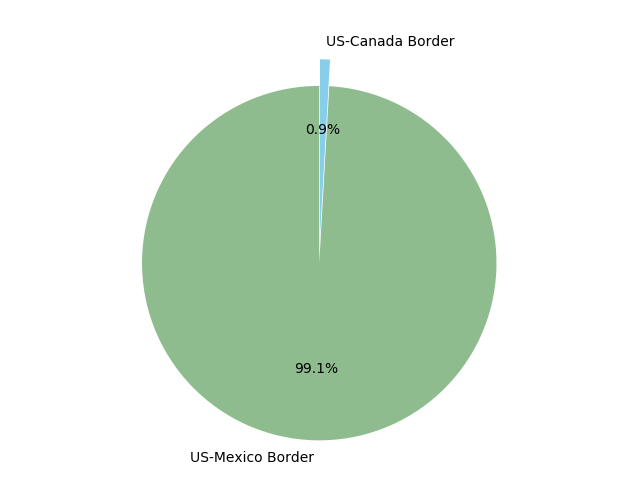

In [28]:
# Create plot
# Pick your colors
colors = ['darkseagreen', 'skyblue']

# Create a pie chart
plt.pie(
    # use this data
    ArrestsbB_df['Value'],
    # label with this
    labels=ArrestsbB_df['Border'],
    # Shadows?
    shadow=False,
    # Colors?
    colors=colors,
    # Explode slices?
    explode=(0.15, 0),
    # Starting angle?
    startangle=90,
    # Format percentage
    autopct='%1.1f%%',
)

# View the plot
plt.tight_layout()
plt.show()

In [25]:
# Query total arrests by sector crossing
ArrestsbS = session.query(Arrests.Sector, Arrests.Territory, func.sum(Arrests.Value)).\
    group_by(Arrests.Sector).order_by(func.sum(Arrests.Value).desc()).all()
ArrestsbS

[('Tucson', 'AZ', 4800093),
 ('Rio Grande Valley', 'TX', 1918020),
 ('San Diego', 'CA', 1570200),
 ('El Centro', 'CA', 1083123),
 ('Laredo', 'TX', 997950),
 ('El Paso', 'NM, TX', 977528),
 ('Yuma', 'CA, AZ', 747546),
 ('Del Rio', 'TX', 747296),
 ('Big Bend', 'TX', 125825),
 ('Miami', 'FL, GA, SC, NC', 79007),
 ('New Orleans', 'LA, AL, MS, FL', 48692),
 ('Buffalo', 'NY, PA', 23193),
 ('Detroit', 'OH, MI, IN, IL', 22825),
 ('Swanton', 'NH, VT, NY', 22343),
 ('Ramey', 'PR', 17487),
 ('Blaine', 'WA, OR', 16480),
 ('Grand Forks', 'WI, MN, ND', 12041),
 ('Havre', 'MT', 10388),
 ('Spokane', 'MT, ID, WA', 8992),
 ('Houlton', 'ME', 3081)]

In [26]:
# Create the dataframe
x = [list(x) for x in ArrestsbS]
ArrestsbS_df = pd.DataFrame(x)
ArrestsbS_df = ArrestsbS_df.rename(columns={0:'Sector', 1:'Territory', 2:'Value'})
ArrestsbS_df.head(20)

,Sector,Territory,Value
0,Tucson,AZ,4800093
1,Rio Grande Valley,TX,1918020
2,San Diego,CA,1570200
3,El Centro,CA,1083123
4,Laredo,TX,997950
5,El Paso,"NM, TX",977528
6,Yuma,"CA, AZ",747546
7,Del Rio,TX,747296
8,Big Bend,TX,125825
9,Miami,"FL, GA, SC, NC",79007


<IPython.core.display.Javascript object>


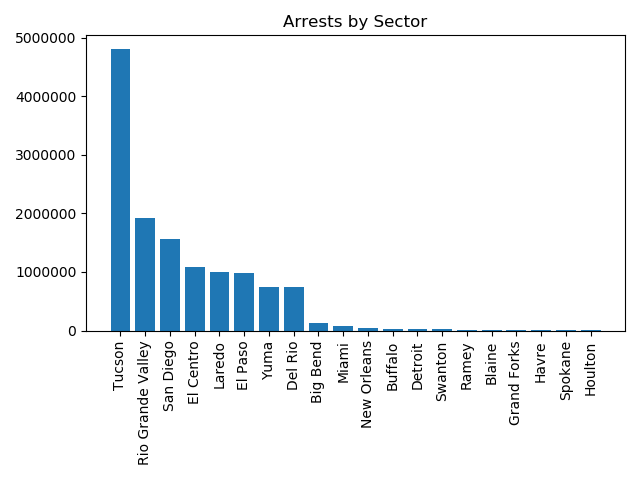

In [27]:
# Create bar chart
x_axis = ArrestsbS_df["Sector"]
y_axis = ArrestsbS_df["Value"]
ticks = np.arange(len(x_axis))
plt.bar(x_axis, y_axis, align="center", alpha=1.0)
plt.xticks(ticks, x_axis, rotation="vertical")
plt.title("Arrests by Sector")
plt.tight_layout()
plt.show()

<<< Conclusion >>> 

It is blatantly obvious that the greatest concentration of crossing and arrest activity occurs along our southern border
between San Diego and Laredo. There appears to be a correlation between crossing and arrest activity, however, my data was
limited and I was unable to statistically make a case for this.